In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_curve, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
df = pd.read_csv('/Users/stevennn/cardiac-strainlabs/training models/dataset-1.csv')
print("=" * 60)
print("DATA LOADED SUCCESSFULLY")
print("=" * 60)
print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

DATA LOADED SUCCESSFULLY

Dataset Shape: (60, 10)
Rows: 60, Columns: 10

Column Names:
['Sl_no', 'Group', 'Age', 'Gender', 'BMI', 'DM', 'PROBNP', 'EF', 'GLS', 'NFATC3']

First few rows:
   Sl_no Group  Age  Gender  BMI  DM  PROBNP  EF  GLS  NFATC3
0      1  Case   52       1   29   1     410  48  -12    1.45
1      2  Case   61       0   24   0     380  50  -15    1.33
2      3  Case   45       1   27   0     295  53  -17    1.28
3      4  Case   58       0   31   1     500  46  -10    1.52
4      5  Case   49       1   26   0     360  54  -14    1.39


In [3]:
# Data Exploration

print("=" * 60)
print("DATA EXPLORATION")
print("=" * 60)

# Basic info
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

DATA EXPLORATION

Data Types:
Sl_no       int64
Group      object
Age         int64
Gender      int64
BMI         int64
DM          int64
PROBNP      int64
EF          int64
GLS         int64
NFATC3    float64
dtype: object

Missing Values:
Sl_no     0
Group     0
Age       0
Gender    0
BMI       0
DM        0
PROBNP    0
EF        0
GLS       0
NFATC3    0
dtype: int64

Basic Statistics:
           Sl_no        Age     Gender        BMI         DM      PROBNP  \
count  60.000000  60.000000  60.000000  60.000000  60.000000   60.000000   
mean   30.500000  51.400000   0.633333  27.266667   0.516667  257.166667   
std    17.464249   9.180303   0.485961   2.968003   0.503939  161.292887   
min     1.000000  36.000000   0.000000  18.000000   0.000000   70.000000   
25%    15.750000  43.000000   0.000000  25.750000   0.000000  110.000000   
50%    30.500000  51.500000   1.000000  27.000000   1.000000  207.500000   
75%    45.250000  59.250000   1.000000  29.000000   1.000000  387.500000   

TARGET VARIABLE ANALYSIS

Target Variable: Group

Class Distribution:
Group
Case       30
Control    30
Name: count, dtype: int64

Class Proportions:
Group
Case       50.0
Control    50.0
Name: proportion, dtype: float64


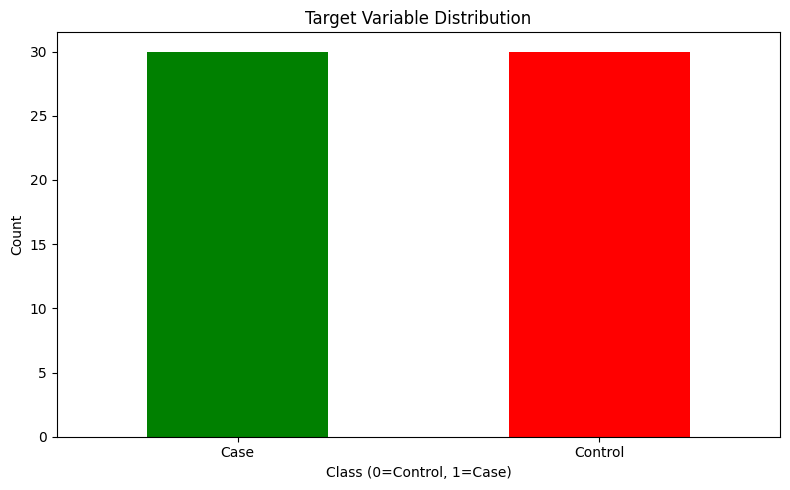


✓ Target variable defined


In [4]:
# Define Target Variable
target_col = 'Group' 
feature_cols = [col for col in df.columns if col not in [target_col, 'Sl_no']] 
X = df[feature_cols]
y = df[target_col]
print("=" * 60)
print("TARGET VARIABLE ANALYSIS")
print("=" * 60)
print(f"\nTarget Variable: {target_col}")
print(f"\nClass Distribution:")
print(y.value_counts())
print(f"\nClass Proportions:")
print(y.value_counts(normalize=True) * 100)
# Visualize class distribution
plt.figure(figsize=(8, 5))
y.value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Target Variable Distribution')
plt.xlabel('Class (0=Control, 1=Case)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Target variable defined")

FEATURE CORRELATION WITH TARGET

Feature Correlations with Target:
NFATC3    0.946622
PROBNP    0.931581
GLS       0.885414
Age       0.161111
BMI       0.158559
Gender    0.000000
DM       -0.033352
EF       -0.887147
dtype: float64


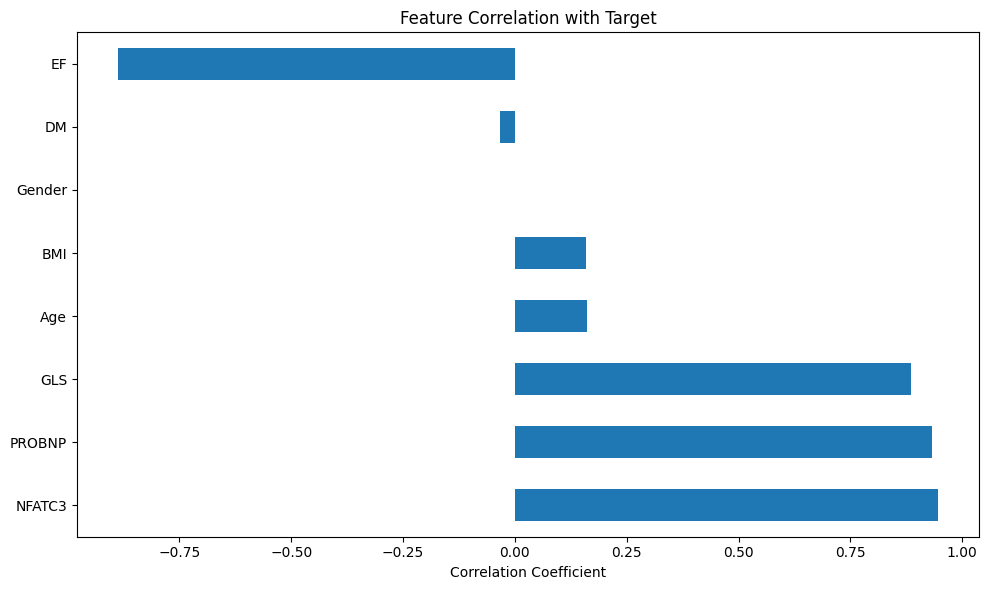

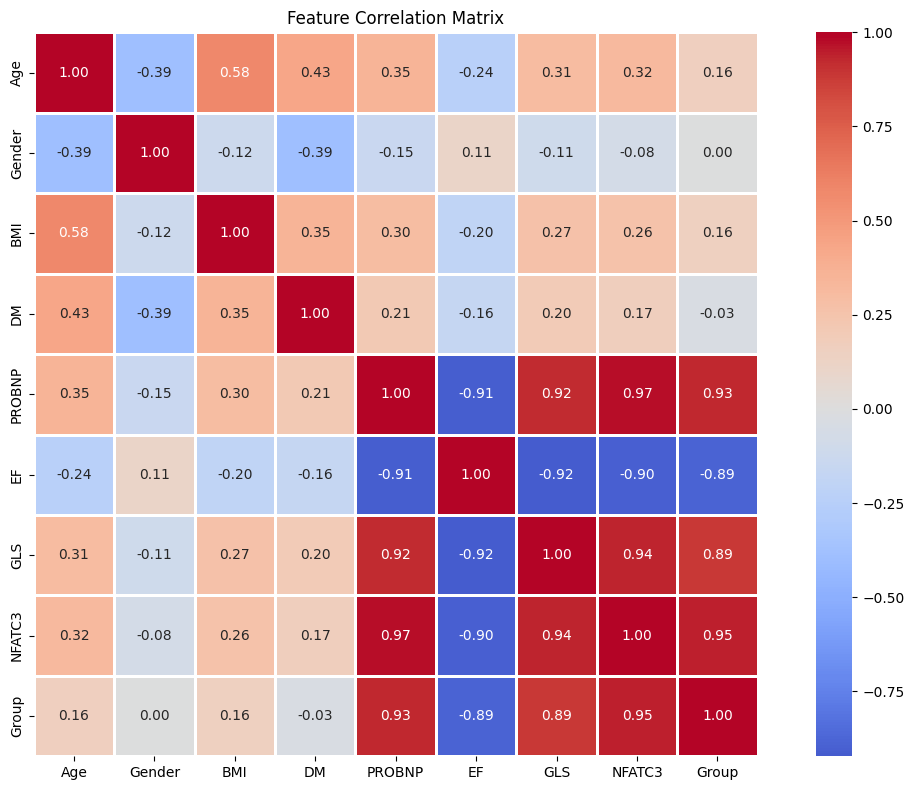

In [5]:
# Feature Correlation Analysis
print("=" * 60)
print("FEATURE CORRELATION WITH TARGET")
print("=" * 60)

# Converting Group to numeric (Case=1, Control=0)
y_numeric = df[target_col].map({'Case': 1, 'Control': 0})

# Calculate correlations
correlations = X.corrwith(y_numeric).sort_values(ascending=False)
print("\nFeature Correlations with Target:")
print(correlations)

# Visualize top correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh')
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.savefig('feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
# Create a temporary dataframe with numeric target for correlation
df_numeric = df[feature_cols].copy()
df_numeric[target_col] = y_numeric
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Train-Test Split
print("=" * 60)
print("SPLITTING DATA")
print("=" * 60)

# Converting target to numeric (Case=1, Control=0)
y = y.map({'Case': 1, 'Control': 0})

# Use stratified split to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

SPLITTING DATA

Training set size: 48 samples
Test set size: 12 samples

Training set class distribution:
Group
1    24
0    24
Name: count, dtype: int64

Test set class distribution:
Group
0    6
1    6
Name: count, dtype: int64


In [7]:
# Feature Scaling

print("=" * 60)
print("FEATURE SCALING")
print("=" * 60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features scaled using StandardScaler")
print(f"\nScaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")

FEATURE SCALING

✓ Features scaled using StandardScaler

Scaled training set shape: (48, 8)
Scaled test set shape: (12, 8)


In [8]:
# Train Logistic Regression Model

print("=" * 60)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("=" * 60)

# Train model with regularization to prevent overfitting
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0,  # Regularization strength
    class_weight='balanced'  # Handle class imbalance
)

model.fit(X_train_scaled, y_train)

print("\n✓ Model trained successfully")
print(f"\nModel Parameters:")
print(f"C (regularization): {model.C}")
print(f"Max iterations: {model.max_iter}")

TRAINING LOGISTIC REGRESSION MODEL

✓ Model trained successfully

Model Parameters:
C (regularization): 1.0
Max iterations: 1000


In [9]:
# Cross-Validation

print("=" * 60)
print("CROSS-VALIDATION (5-Fold)")
print("=" * 60)

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"Individual fold scores: {[f'{score:.4f}' for score in cv_scores]}")

CROSS-VALIDATION (5-Fold)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000 (+/- 0.0000)
Individual fold scores: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000']


In [10]:
print("=" * 60)
print("TRAINING SET PERFORMANCE")
print("=" * 60)

y_train_pred = model.predict(X_train_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print(f"\nAccuracy:  {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-Score:  {train_f1:.4f}")

TRAINING SET PERFORMANCE

Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


In [11]:
# Model Evaluation on Test Set

print("=" * 60)
print("TEST SET PERFORMANCE")
print("=" * 60)

y_test_pred = model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"\nAccuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")

print("\n" + "=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test, y_test_pred, 
                          target_names=['Control', 'Case']))

TEST SET PERFORMANCE

Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000

CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Control       1.00      1.00      1.00         6
        Case       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



CONFUSION MATRIX

Confusion Matrix:
[[6 0]
 [0 6]]


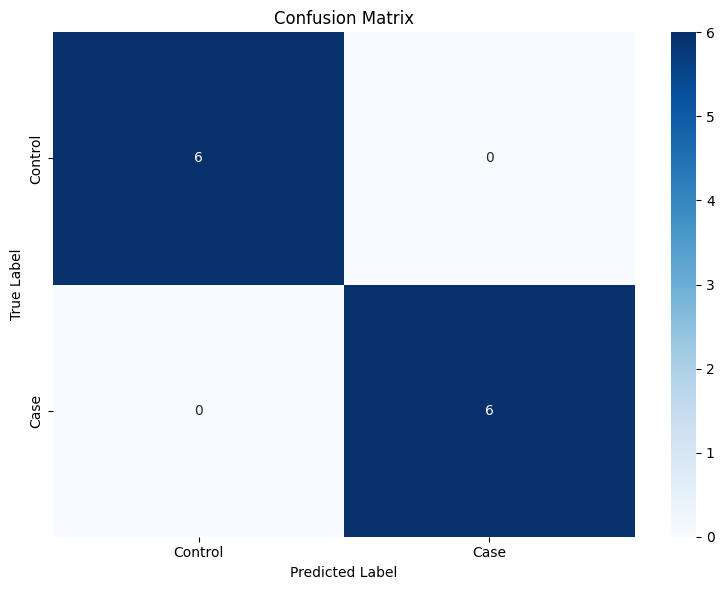

In [12]:
# Confusion Matrix Visualization

print("=" * 60)
print("CONFUSION MATRIX")
print("=" * 60)

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Control', 'Case'],
            yticklabels=['Control', 'Case'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

ROC CURVE

ROC AUC Score: 1.0000


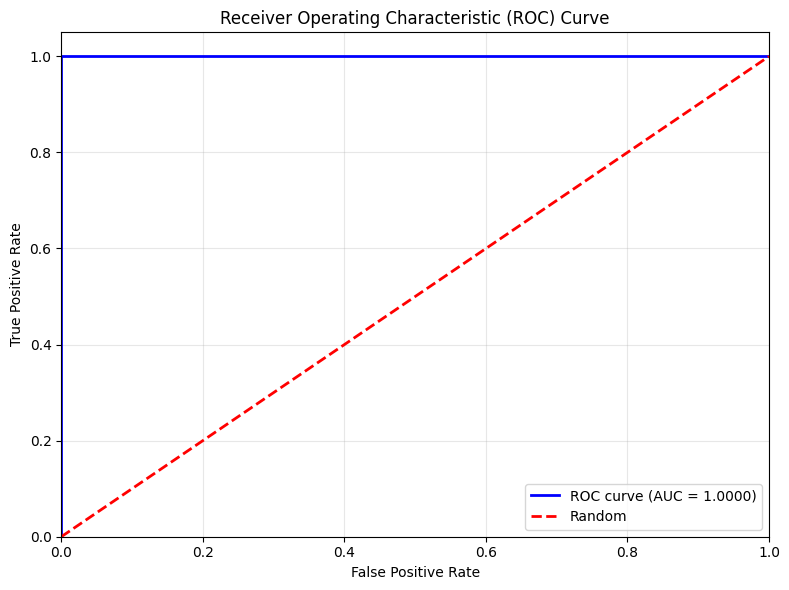

In [13]:
# ROC Curve

print("=" * 60)
print("ROC CURVE")
print("=" * 60)

y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

print(f"\nROC AUC Score: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

FEATURE IMPORTANCE

Feature Coefficients (sorted by absolute value):
  Feature  Coefficient  Abs_Coefficient
7  NFATC3     1.194076         1.194076
4  PROBNP     1.168483         1.168483
5      EF    -0.958289         0.958289
6     GLS     0.869017         0.869017
3      DM    -0.427677         0.427677
0     Age    -0.137346         0.137346
1  Gender     0.128747         0.128747
2     BMI     0.028610         0.028610


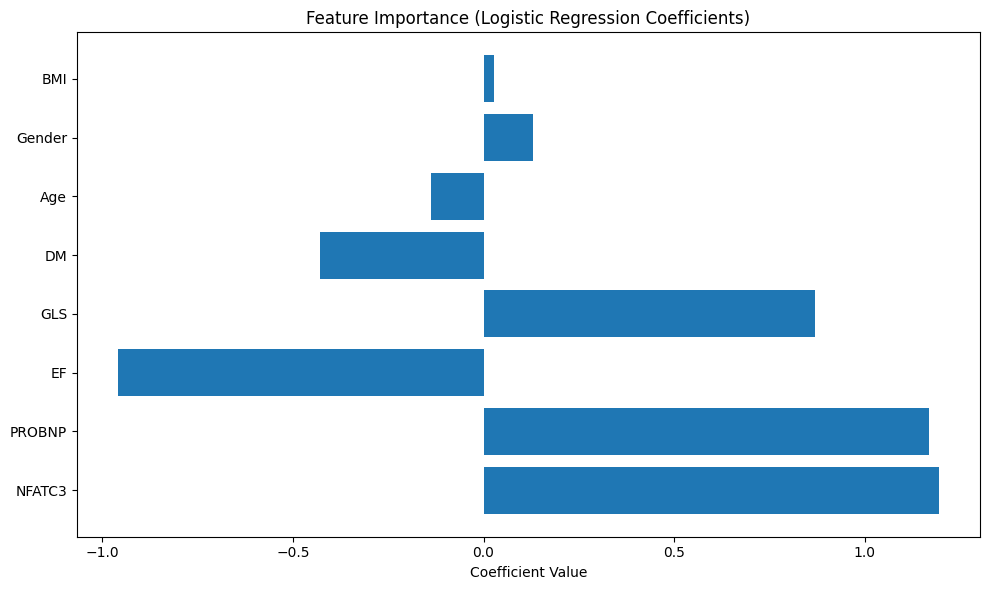

In [14]:
# Feature Importance

print("=" * 60)
print("FEATURE IMPORTANCE")
print("=" * 60)

# Get coefficients
coefficients = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_[0]
})
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Coefficients (sorted by absolute value):")
print(coefficients)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Predict for New Patient
print("=" * 60)
print("PREDICTION FOR NEW PATIENT")
print("=" * 60)

# Patient data 
new_patient = {
    'Age': 28,
    'Gender': 1,
    'BMI': 28,
    'DM': 0,
    'PROBNP': 420,
    'EF': 48,
    'GLS': -10,
    'NFATC3': 1.45
}

# Create DataFrame
new_patient_df = pd.DataFrame([new_patient])

new_patient_df = new_patient_df[feature_cols]

# Scale features
new_patient_scaled = scaler.transform(new_patient_df)

# Predict
prediction = model.predict(new_patient_scaled)[0]
probability = model.predict_proba(new_patient_scaled)[0]

print("\nPatient Information:")
for key, value in new_patient.items():
    print(f"  {key}: {value}")

print(f"\nPrediction: {'CASE (At Risk)' if prediction == 1 else 'CONTROL (Not At Risk)'}")
print(f"Probability of being at risk: {probability[1]:.2%}")
print(f"Confidence: {max(probability):.2%}")

PREDICTION FOR NEW PATIENT

Patient Information:
  Age: 28
  Gender: 1
  BMI: 28
  DM: 0
  PROBNP: 420
  EF: 48
  GLS: -10
  NFATC3: 1.45

Prediction: CASE (At Risk)
Probability of being at risk: 99.91%
Confidence: 99.91%


In [17]:
#Model Summary

print("\n" + "=" * 60)
print("MODEL SUMMARY")
print("=" * 60)

summary = f"""
Model: Logistic Regression
Purpose: Heart Failure Prediction

Training Performance:
  - Accuracy:  {train_accuracy:.4f}
  - Precision: {train_precision:.4f}
  - Recall:    {train_recall:.4f}
  - F1-Score:  {train_f1:.4f}

Test Performance:
  - Accuracy:  {test_accuracy:.4f}
  - Precision: {test_precision:.4f}
  - Recall:    {test_recall:.4f}
  - F1-Score:  {test_f1:.4f}

Cross-Validation:
  - Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})

ROC AUC Score: {roc_auc:.4f}

Most Important Features:
{coefficients.head(3)[['Feature', 'Coefficient']].to_string(index=False)}
"""

print(summary)


MODEL SUMMARY

Model: Logistic Regression
Purpose: Heart Failure Prediction

Training Performance:
  - Accuracy:  1.0000
  - Precision: 1.0000
  - Recall:    1.0000
  - F1-Score:  1.0000

Test Performance:
  - Accuracy:  1.0000
  - Precision: 1.0000
  - Recall:    1.0000
  - F1-Score:  1.0000

Cross-Validation:
  - Mean Accuracy: 1.0000 (+/- 0.0000)

ROC AUC Score: 1.0000

Most Important Features:
Feature  Coefficient
 NFATC3     1.194076
 PROBNP     1.168483
     EF    -0.958289

